In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Starting off w/ just batting statistics (no pitching stuff just yet)
- On Base Percentage (last season avg and last 30 games)
- Slugging Percentage (last season avg and last 30 games) 

In [17]:
df = pd.read_csv("df_bp1.csv")


features = ["OBP_162_h", "OBP_162_v", "SLG_162_h", "SLG_162_v",
            "OBP_30_h", "OBP_30_v", "SLG_30_h", "SLG_30_v",]

target = "home_victory"

X = df.loc[:,features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/var/folders/x4/9gxy2p1d4nd09kxmx07_g7b00000gn/T/ipykernel_5604/3410908323.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_bp1.csv")


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.533351409978308


In [19]:
df_odds = df[(df.season >= 2012) & (df.season <= 2021)]
df_odds.sample(5)

,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,...,CS_30_v,ERR_162_h,ERR_162_v,ERR_30_h,ERR_30_v,ML_h,ML_v,imp_prob_h,imp_prob_v,imp_prob_mid_h
15854,2016-05-21,0,Sat,WAS,NL,43,MIA,NL,42,2,...,0.0,0.0,0.0,0.0,0.0,-142.0,127.0,0.586777,0.440529,0.573124
26356,2020-09-06,0,Sun,MIL,NL,39,CLE,AL,40,1,...,0.0,0.0,0.0,0.0,0.0,-260.0,230.0,0.722222,0.303030,0.709596
18231,2017-05-11,0,Thu,SEA,AL,35,TOR,AL,35,2,...,0.0,0.0,0.0,0.0,0.0,-158.0,143.0,0.612403,0.411523,0.600440
25440,2019-09-21,0,Sat,SFN,NL,155,ATL,NL,156,1,...,0.0,0.0,0.0,0.0,0.0,-145.0,135.0,0.591837,0.425532,0.583152
21937,2018-07-23,0,Mon,OAK,AL,101,TEX,AL,101,15,...,0.0,0.0,0.0,0.0,0.0,-106.0,-104.0,0.514563,0.509804,0.502380


(array([0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 4.00e+00, 9.00e+00, 1.30e+01, 1.20e+01, 1.10e+01,
        2.50e+01, 3.30e+01, 4.50e+01, 7.10e+01, 8.70e+01, 1.00e+02,
        1.19e+02, 1.53e+02, 2.35e+02, 1.76e+02, 2.72e+02, 3.30e+02,
        3.44e+02, 4.42e+02, 4.92e+02, 4.56e+02, 4.56e+02, 7.63e+02,
        6.69e+02, 7.05e+02, 7.52e+02, 7.42e+02, 9.90e+02, 1.29e+03,
        8.62e+02, 9.13e+02, 9.89e+02, 9.58e+02, 1.29e+03, 8.00e+02,
        9.29e+02, 9.98e+02, 8.63e+02, 8.53e+02, 8.35e+02, 8.13e+02,
        5.82e+02, 8.11e+02, 3.43e+02, 4.25e+02, 2.75e+02, 3.30e+02,
        1.91e+02, 2.49e+02, 1.38e+02, 1.49e+02, 1.12e+02, 7.20e+01,
        5.30e+01, 4.90e+01, 1.90e+01, 1.60e+01, 8.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 0.00e+00, 0.00e+00]),
 array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25,
        0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
        0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44

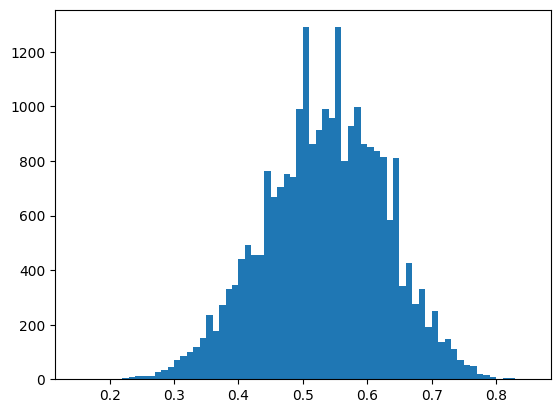

In [ ]:
# Shape of what the Vegas odds are for the games
plt.hist(df_odds.imp_prob_mid_h, bins=np.linspace(.15,.85,71))

In [ ]:
plt.hist(df_odds.imp_prob_h + df_odds.imp_prob_v, bins=np.linspace(1,1.06,61));